# Intro to Inferential Statistics: Distributions

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# some observations follow an exponential dist
r1 = stats.expon.rvs(size=10000, random_state=1000)

# some follow a normal dist. loc = mean, scale = sigma
r2 = stats.norm.rvs(loc=2, scale=1.5, size=10000, random_state=847)

# some follow a constant dist: loc = min_value, scale = b - a
r3 = stats.uniform.rvs(loc=-2, scale=9, size=10000, random_state=128)

# there's a weird spike at some point
r4 = stats.uniform.rvs(loc=5.5, scale=1, size=10000, random_state=128)

pop = pd.Series(np.concatenate([r1, r2, r3, r4]))

<AxesSubplot:>

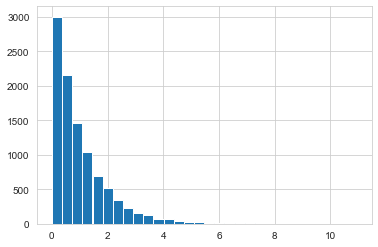

In [20]:
pd.Series(r1).hist(bins=30,)

<AxesSubplot:>

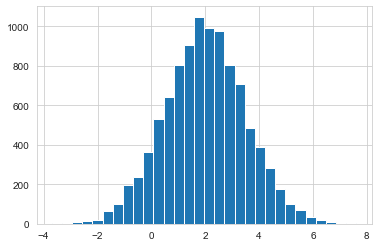

In [21]:
pd.Series(r2).hist(bins=30)

<AxesSubplot:>

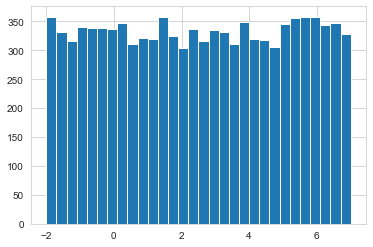

In [22]:
pd.Series(r3).hist(bins=30,)

<AxesSubplot:>

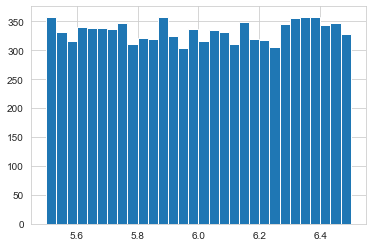

In [23]:
pd.Series(r4).hist(bins=30,)

In [24]:
pop

0        1.060131
1        0.122175
2        3.001406
3        0.658150
4        2.059439
           ...   
39995    6.251156
39996    6.355754
39997    6.092473
39998    6.215168
39999    5.944210
Length: 40000, dtype: float64

<AxesSubplot:>

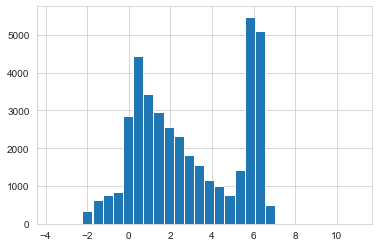

In [25]:
pop.hist(bins=30,)

In [26]:
pop_mean = pop.mean()
pop_std  = pop.std()
print(pop_mean)
print(pop_std)

2.8779664171955193
2.4710350065769657


<AxesSubplot:>

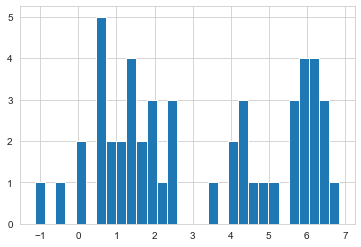

In [39]:
# sample of size 50
n = 50
sample = pd.Series(pop).sample(n, random_state=9)
sample.hist(bins=30,)

In [40]:
sample_mean=sample.mean()
sample_mean

3.199175396763954

In [41]:
sample_std=sample.std()
sample_std

2.349017278767468

## Probability Density function

In [42]:
stats.norm.pdf(r2)

array([0.03070856, 0.00759148, 0.329085  , ..., 0.25671513, 0.18642306,
       0.00038437])

In [58]:
# generate a sample from r2 and fit a normal distribution
sample =  pd.Series(r2).sample(n, random_state=34) #normal(loc=50, scale=5, size=1000)
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)

In [50]:
# define the distribution
dist = stats.norm(sample_mean, sample_std)

In [53]:
values = [value for value in range(-3, 10)]
probabilities = [dist.pdf(value) for value in values]

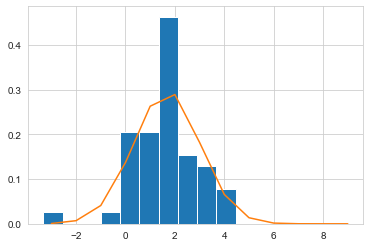

In [56]:
# plot the histogram and pdf profile
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

random with numpy

(array([   8.,   58.,  407., 1353., 2539., 2869., 1901.,  690.,  157.,
          18.]),
 array([-3.97078376, -3.20825804, -2.44573233, -1.68320661, -0.92068089,
        -0.15815517,  0.60437054,  1.36689626,  2.12942198,  2.89194769,
         3.65447341]),
 <BarContainer object of 10 artists>)

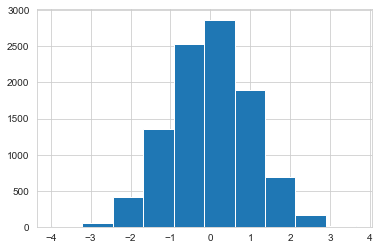

In [57]:
from numpy.random import normal
# generate a sample from a normal distribution
sample = normal(size=10000)

plt.hist(sample, bins=10)